<a href="https://colab.research.google.com/github/Aswini-Dileep/Assignment/blob/main/Supervised_Learning_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Churn Prediction**

In [124]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier

In [125]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [126]:
filepath_train = '/content/drive/MyDrive/DSA_Notes/Data Sets/Supervised_Learning_Case_Study/Training_data.csv'
filepath_test = '/content/drive/MyDrive/DSA_Notes/Data Sets/Supervised_Learning_Case_Study/Testing_data.csv'

# Exploratory Data Analysis (EDA)

In [127]:
df_train = pd.read_csv(filepath_train)
df_train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9509-MPYOD,Female,0,No,No,35,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.75,700.45,No
1,7746-AWNQW,Female,0,No,No,28,No,No phone service,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,35.75,961.4,No
2,2208-UGTGR,Male,0,No,No,56,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,98.60,5581.05,No
3,4884-LEVMQ,Male,0,Yes,No,39,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.45,790,No
4,6682-VCIXC,Female,0,Yes,Yes,43,No,No phone service,DSL,NaN,...,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),51.25,2151.6,No


In [128]:
df_test = pd.read_csv(filepath_test)
df_test.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,6080-TCMYC,Male,0,Yes,Yes,40,Yes,Yes,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,81.20,3292.3,No
1,7285-KLOTR,Female,0,Yes,No,12,Yes,Yes,DSL,Yes,...,Yes,No,Yes,Yes,One year,No,Electronic check,78.85,876.75,No
2,7486-KSRVI,Male,0,No,No,43,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,One year,Yes,Electronic check,100.00,4211.55,Yes
3,9924-JPRMC,Male,0,No,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.20,8547.15,No
4,4439-YRNVD,Female,0,No,No,10,No,No phone service,DSL,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,36.25,374,No


In [129]:
df_train.size

118314

In [130]:
df_test.size

29589

In [131]:
df_train.shape

(5634, 21)

In [132]:
df_test.shape

(1409, 21)

In [133]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5465 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5465 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [134]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1409 non-null   object 
 1   gender            1409 non-null   object 
 2   SeniorCitizen     1409 non-null   int64  
 3   Partner           1409 non-null   object 
 4   Dependents        1409 non-null   object 
 5   tenure            1409 non-null   int64  
 6   PhoneService      1409 non-null   object 
 7   MultipleLines     1409 non-null   object 
 8   InternetService   1409 non-null   object 
 9   OnlineSecurity    1409 non-null   object 
 10  OnlineBackup      1409 non-null   object 
 11  DeviceProtection  1409 non-null   object 
 12  TechSupport       1409 non-null   object 
 13  StreamingTV       1409 non-null   object 
 14  StreamingMovies   1409 non-null   object 
 15  Contract          1409 non-null   object 
 16  PaperlessBilling  1409 non-null   object 


In [135]:
df_train.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,5634.000000,5634.000000,5240.000000
mean,0.159744,32.606851,65.102052
std,0.366401,24.614976,30.056443
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,36.800000
50%,0.000000,29.000000,70.650000
75%,0.000000,56.000000,90.050000
max,1.000000,72.000000,118.750000


In [136]:
df_test.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,1409.000000,1409.000000,1409.000000
mean,0.171753,31.428673,63.898013
std,0.377300,24.322161,30.282693
min,0.000000,0.000000,18.700000
25%,0.000000,8.000000,30.100000
50%,0.000000,27.000000,69.900000
75%,0.000000,54.000000,89.500000
max,1.000000,72.000000,118.600000


In [137]:
df_train.nunique()

,0
customerID,5634
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


# Preprocessing

# Data Cleaning

### Remove unwanted columns

In [138]:
df_train.drop(columns=['customerID', 'Partner', 'Dependents'], inplace=True)
df_test.drop(columns=['customerID', 'Partner', 'Dependents'], inplace=True)

In [139]:
df_train['MultipleLines'].unique()

array(['No', 'No phone service', 'Yes'], dtype=object)

In [140]:
df_train['OnlineSecurity'].unique()

array(['No internet service', 'No', nan, 'Yes'], dtype=object)

In [141]:
df_train['OnlineBackup'].unique()

array(['No internet service', 'No', 'Yes'], dtype=object)

In [142]:
df_train['DeviceProtection'].unique()

array(['No internet service', 'Yes', 'No'], dtype=object)

In [143]:
df_train['TechSupport'].unique()

array(['No internet service', 'Yes', 'No'], dtype=object)

In [144]:
df_train['StreamingTV'].unique()

array(['No internet service', 'No', 'Yes'], dtype=object)

In [145]:
df_train['StreamingMovies'].unique()

array(['No internet service', 'No', 'Yes'], dtype=object)

In [146]:
df_train['MultipleLines'] = df_train['MultipleLines'].replace('No phone service', 'No')
df_train['OnlineSecurity'] = df_train['OnlineSecurity'].replace('No internet service', 'No')
df_train['OnlineBackup'] = df_train['OnlineBackup'].replace('No internet service', 'No')
df_train['DeviceProtection'] = df_train['DeviceProtection'].replace('No internet service', 'No')
df_train['TechSupport'] = df_train['TechSupport'].replace('No internet service', 'No')
df_train['StreamingTV'] = df_train['StreamingTV'].replace('No internet service', 'No')
df_train['StreamingMovies'] = df_train['StreamingMovies'].replace('No internet service', 'No')

In [147]:
df_train.nunique()

,0
gender,2
SeniorCitizen,2
tenure,73
PhoneService,2
MultipleLines,2
InternetService,3
OnlineSecurity,2
OnlineBackup,2
DeviceProtection,2
TechSupport,2


In [148]:
df_test.nunique()

,0
gender,2
SeniorCitizen,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3
OnlineBackup,3
DeviceProtection,3
TechSupport,3


In [149]:
df_test['MultipleLines'] = df_test['MultipleLines'].replace('No phone service', 'No')
df_test['OnlineSecurity'] = df_test['OnlineSecurity'].replace('No internet service', 'No')
df_test['OnlineBackup'] = df_test['OnlineBackup'].replace('No internet service', 'No')
df_test['DeviceProtection'] = df_test['DeviceProtection'].replace('No internet service', 'No')
df_test['TechSupport'] = df_test['TechSupport'].replace('No internet service', 'No')
df_test['StreamingTV'] = df_test['StreamingTV'].replace('No internet service', 'No')
df_test['StreamingMovies'] = df_test['StreamingMovies'].replace('No internet service', 'No')

In [150]:
df_test.nunique()

,0
gender,2
SeniorCitizen,2
tenure,73
PhoneService,2
MultipleLines,2
InternetService,3
OnlineSecurity,2
OnlineBackup,2
DeviceProtection,2
TechSupport,2


### Duplicate Removal

In [151]:
df_train[df_train.duplicated()].index

Index([ 737, 1442, 1845, 2117, 2618, 2988, 3596, 3757, 3995, 4348, 4439, 4637,
       5145, 5309, 5456],
      dtype='int64')

In [152]:
df_train.T[df_train.T.duplicated()].index

Index([], dtype='object')

In [153]:
df_test[df_test.duplicated()].index

Index([571, 1175], dtype='int64')

In [154]:
df_test.T[df_test.T.duplicated()].index

Index([], dtype='object')

### Handling Missing Values

In [155]:
df_train.isna().sum()

,0
gender,169
SeniorCitizen,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,169
OnlineBackup,0
DeviceProtection,0
TechSupport,0


In [156]:
df_train['gender'].ffill(inplace=True)

/tmp/ipython-input-282050689.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['gender'].ffill(inplace=True)


In [157]:
df_train.OnlineSecurity = df_train.OnlineSecurity.fillna(df_train.OnlineSecurity.mode()[0])

In [158]:
df_train.isna().sum()

,0
gender,0
SeniorCitizen,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0
DeviceProtection,0
TechSupport,0


In [159]:
df_train['MonthlyCharges'].isnull().mean() * 100

np.float64(6.993255236066738)

In [160]:
df_train['TotalCharges'].isnull().mean() * 100

np.float64(4.98757543485978)

In [161]:
df_train.MonthlyCharges = df_train.MonthlyCharges.fillna(df_train.MonthlyCharges.mean())

In [162]:
df_train['TotalCharges'] = pd.to_numeric(df_train['TotalCharges'], errors='coerce')

In [163]:
df_train.TotalCharges = df_train.TotalCharges.fillna(df_train.TotalCharges.mean())

In [164]:
df_train.isna().sum()

,0
gender,0
SeniorCitizen,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0
DeviceProtection,0
TechSupport,0


In [165]:
df_train.head()

,gender,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,35,Yes,No,No,No,No,No,No,No,No,One year,No,Mailed check,20.75,700.45,No
1,Female,0,28,No,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,35.75,961.40,No
2,Male,0,56,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,No,Electronic check,98.60,5581.05,No
3,Male,0,39,Yes,No,No,No,No,No,No,No,No,Two year,Yes,Bank transfer (automatic),20.45,790.00,No
4,Female,0,43,No,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),51.25,2151.60,No


In [166]:
df_test.isna().sum()

,0
gender,0
SeniorCitizen,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0
DeviceProtection,0
TechSupport,0


In [167]:
df_train['SeniorCitizen'].value_counts()

,count
SeniorCitizen,
0,4734
1,900


### Outlier Removal

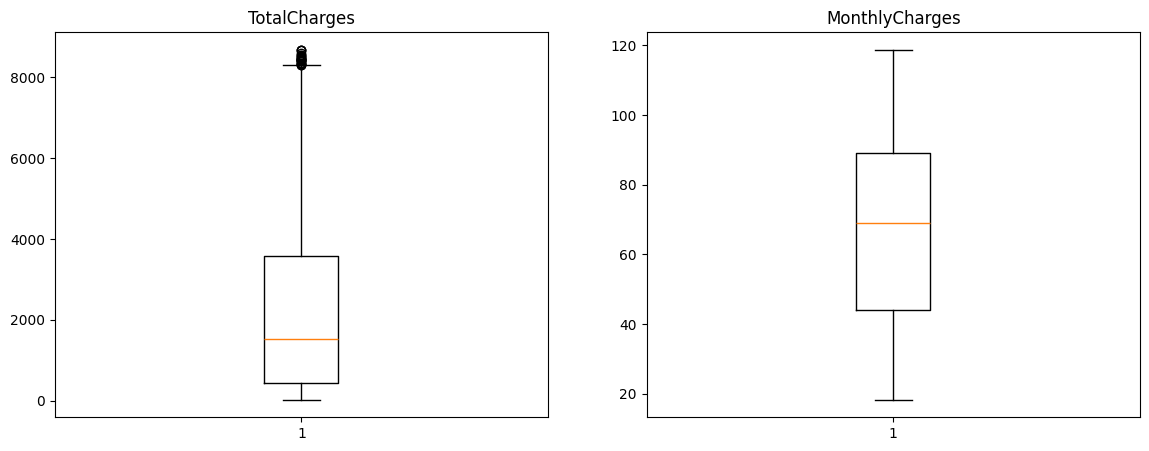

In [168]:
fig, ax = plt.subplots(1, 2, figsize = (14, 5))

ax[0].boxplot(x = df_train['TotalCharges'])
ax[0].set_title('TotalCharges')

ax[1].boxplot(x = df_train['MonthlyCharges'])
ax[1].set_title('MonthlyCharges')

plt.show()

In [169]:
Q1 = df_train['TotalCharges'].quantile(0.25)
Q3 = df_train['TotalCharges'].quantile(0.75)

IQR = Q3 - Q1
low_limit = Q1 - 1.5 * IQR
up_limit = Q3 + 1.5 * IQR


In [170]:
outliers = []
for i in df_train['TotalCharges']:
  if i < low_limit or i > up_limit:
    outliers.append(i)

print(outliers)

[8349.45, 8496.7, 8476.5, 8309.55, 8317.95, 8332.15, 8404.9, 8425.15, 8670.1, 8684.8, 8468.2, 8333.95, 8594.4, 8399.15, 8456.75, 8436.25, 8477.6, 8425.3, 8543.25, 8672.45, 8564.75, 8349.7, 8529.5, 8424.9]


In [171]:
df_train['TotalCharges'] = df_train['TotalCharges'].clip(low_limit, up_limit)

<Axes: ylabel='TotalCharges'>

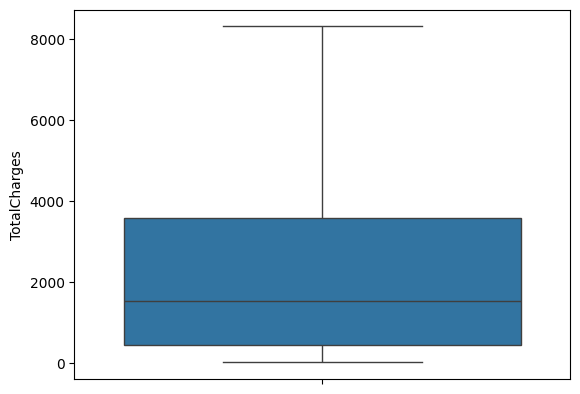

In [172]:
sns.boxplot(data = df_train['TotalCharges'])

In [173]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            1409 non-null   object 
 1   SeniorCitizen     1409 non-null   int64  
 2   tenure            1409 non-null   int64  
 3   PhoneService      1409 non-null   object 
 4   MultipleLines     1409 non-null   object 
 5   InternetService   1409 non-null   object 
 6   OnlineSecurity    1409 non-null   object 
 7   OnlineBackup      1409 non-null   object 
 8   DeviceProtection  1409 non-null   object 
 9   TechSupport       1409 non-null   object 
 10  StreamingTV       1409 non-null   object 
 11  StreamingMovies   1409 non-null   object 
 12  Contract          1409 non-null   object 
 13  PaperlessBilling  1409 non-null   object 
 14  PaymentMethod     1409 non-null   object 
 15  MonthlyCharges    1409 non-null   float64
 16  TotalCharges      1409 non-null   object 


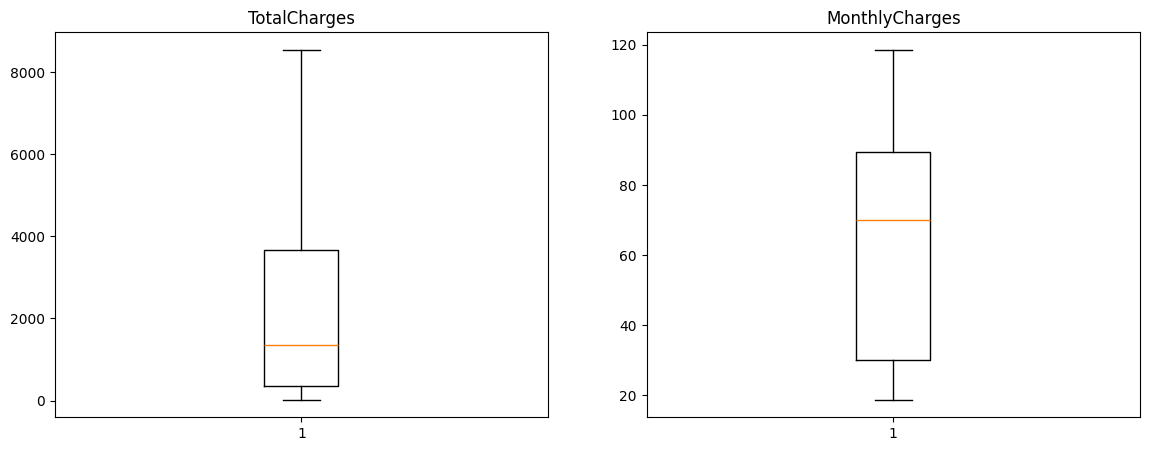

In [174]:
df_test['TotalCharges'] = pd.to_numeric(df_test['TotalCharges'], errors='coerce')
df_test.TotalCharges = df_test.TotalCharges.fillna(df_test.TotalCharges.mean())

fig, ax = plt.subplots(1, 2, figsize = (14, 5))

ax[0].boxplot(x = df_test['TotalCharges'])
ax[0].set_title('TotalCharges')

ax[1].boxplot(x = df_test['MonthlyCharges'])
ax[1].set_title('MonthlyCharges')

plt.show()

## Scaling

In [175]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5634 non-null   object 
 1   SeniorCitizen     5634 non-null   int64  
 2   tenure            5634 non-null   int64  
 3   PhoneService      5634 non-null   object 
 4   MultipleLines     5634 non-null   object 
 5   InternetService   5634 non-null   object 
 6   OnlineSecurity    5634 non-null   object 
 7   OnlineBackup      5634 non-null   object 
 8   DeviceProtection  5634 non-null   object 
 9   TechSupport       5634 non-null   object 
 10  StreamingTV       5634 non-null   object 
 11  StreamingMovies   5634 non-null   object 
 12  Contract          5634 non-null   object 
 13  PaperlessBilling  5634 non-null   object 
 14  PaymentMethod     5634 non-null   object 
 15  MonthlyCharges    5634 non-null   float64
 16  TotalCharges      5634 non-null   float64


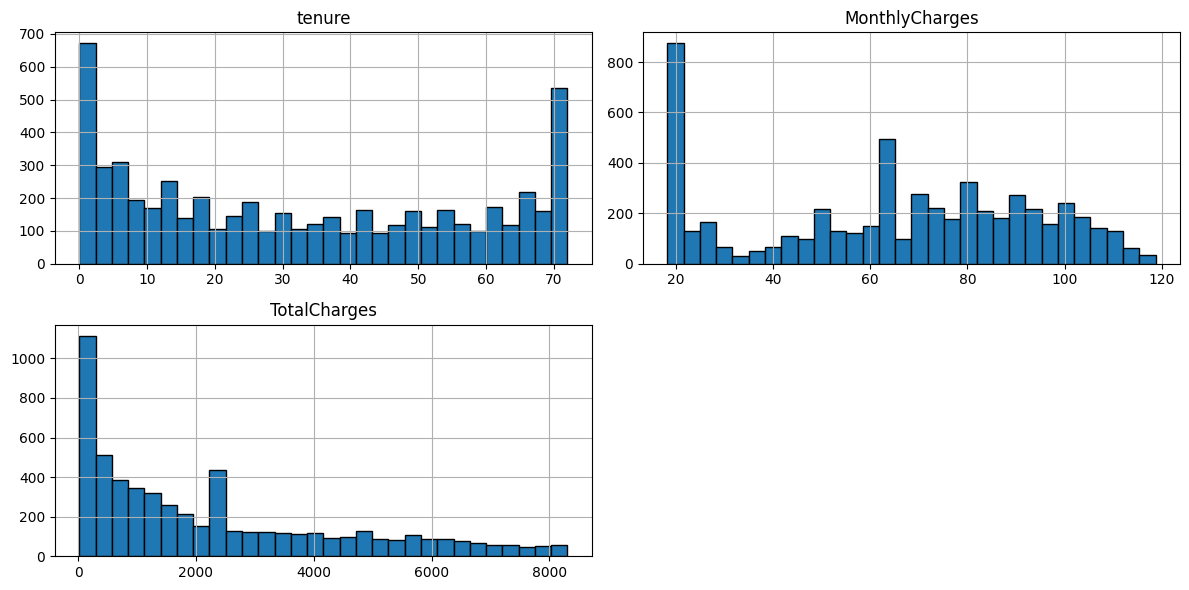

In [176]:
desired_columns = ['tenure', 'MonthlyCharges','TotalCharges']

# Plot histograms for selected columns of train data set
df_train[desired_columns].hist(bins=30, figsize=(12, 6), edgecolor='black')
plt.tight_layout()
plt.show()

In [177]:
min_max_scale = MinMaxScaler(feature_range=(0,1))

df_train['tenure'] = min_max_scale.fit_transform(df_train[['tenure']])
df_train['MonthlyCharges'] = min_max_scale.fit_transform(df_train[['MonthlyCharges']])
df_train['TotalCharges'] = min_max_scale.fit_transform(df_train[['TotalCharges']])

In [178]:
df_train.head()

,gender,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,0.486111,Yes,No,No,No,No,No,No,No,No,One year,No,Mailed check,0.024876,0.082235,No
1,Female,0,0.388889,No,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,0.174129,0.113719,No
2,Male,0,0.777778,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,No,Electronic check,0.799502,0.671082,No
3,Male,0,0.541667,Yes,No,No,No,No,No,No,No,No,Two year,Yes,Bank transfer (automatic),0.021891,0.093040,No
4,Female,0,0.597222,No,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0.328358,0.257317,No


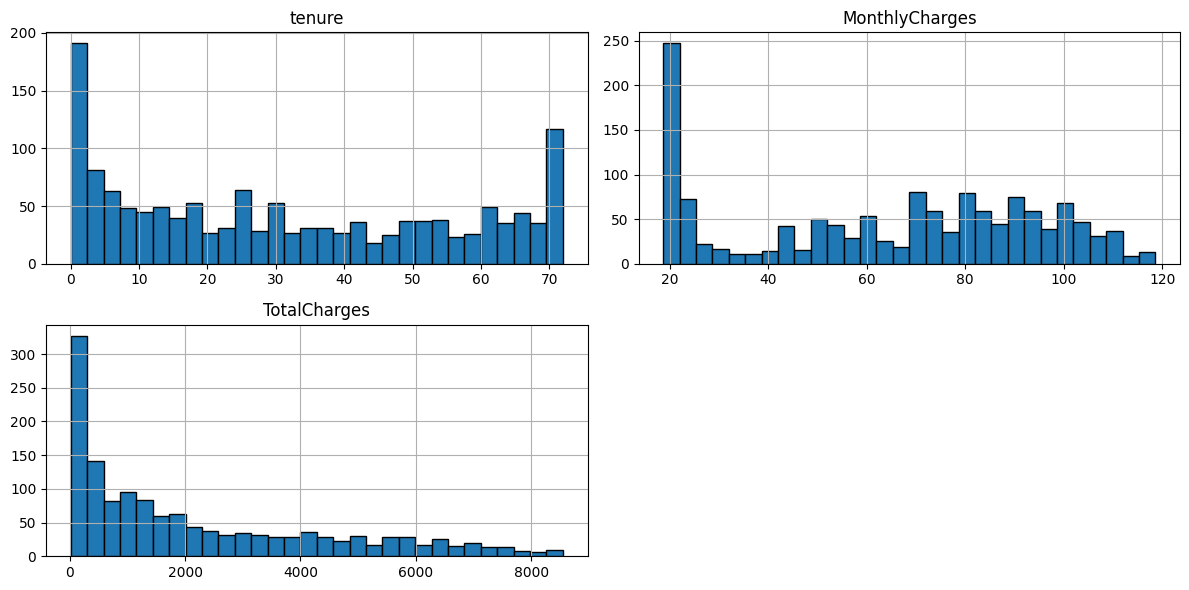

In [179]:
# Plot histograms for selected columns of test data set
df_test[desired_columns].hist(bins=30, figsize=(12, 6), edgecolor='black')
plt.tight_layout()
plt.show()

In [180]:
df_test['tenure'] = min_max_scale.fit_transform(df_test[['tenure']])
df_test['MonthlyCharges'] = min_max_scale.fit_transform(df_test[['MonthlyCharges']])
df_test['TotalCharges'] = min_max_scale.fit_transform(df_test[['TotalCharges']])

In [181]:
df_test.head()

,gender,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,0.555556,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,0.625626,0.383837,No
1,Female,0,0.166667,Yes,Yes,DSL,Yes,No,Yes,No,Yes,Yes,One year,No,Electronic check,0.602102,0.100600,No
2,Male,0,0.597222,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,One year,Yes,Electronic check,0.813814,0.491625,Yes
3,Male,0,1.000000,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,0.995996,1.000000,No
4,Female,0,0.138889,No,No,DSL,No,Yes,No,Yes,No,No,Month-to-month,No,Electronic check,0.175676,0.041649,No


## Feature Engineering

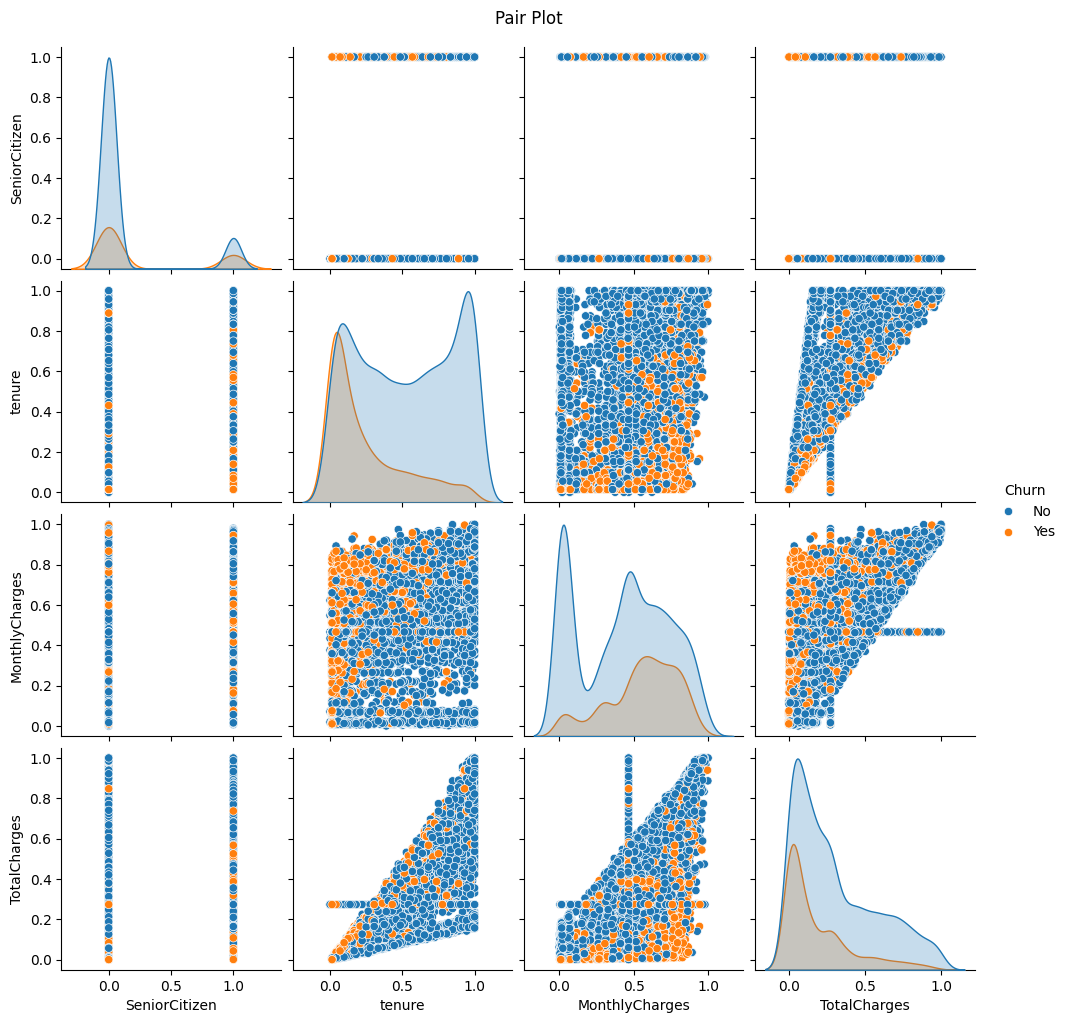

In [182]:
sns.pairplot(data=df_train,hue='Churn')
plt.suptitle("Pair Plot", y=1.02)
plt.show()

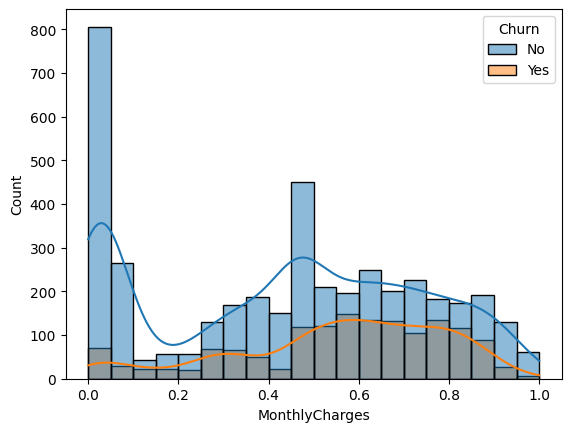

In [183]:
sns.histplot(data=df_train, x='MonthlyCharges', kde=True, hue='Churn')
plt.show()

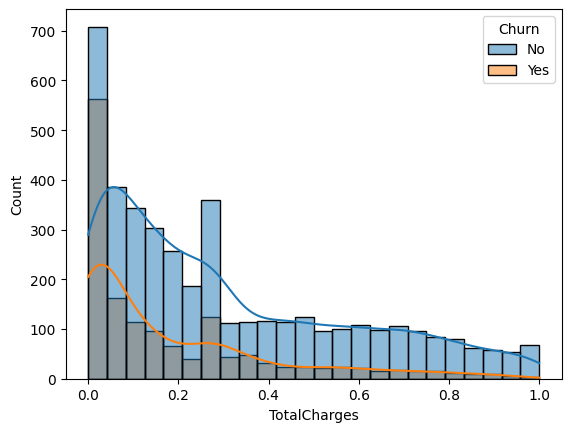

In [184]:
sns.histplot(data=df_train, x='TotalCharges', kde=True, hue='Churn')
plt.show()

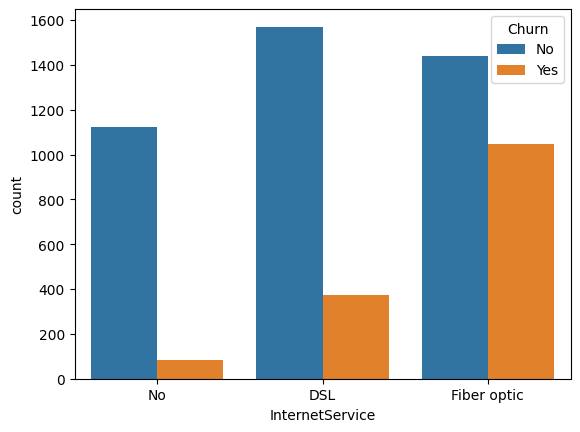

In [185]:
sns.countplot(data=df_train, x='InternetService', hue='Churn')
plt.show()

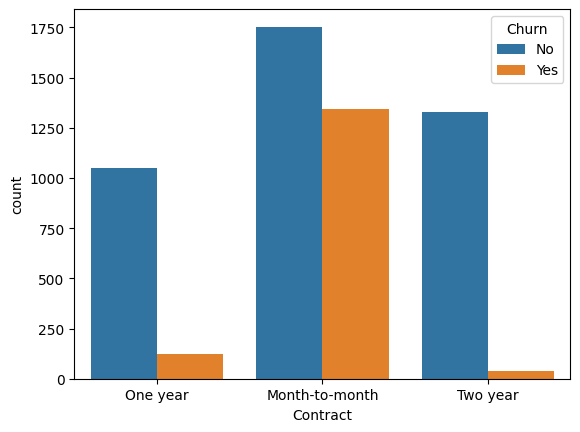

In [186]:
sns.countplot(data=df_train, x='Contract', hue='Churn')
plt.show()

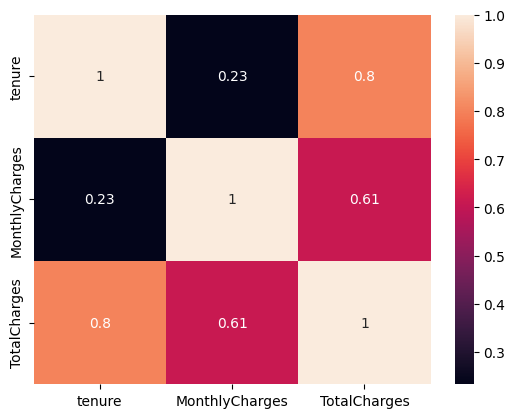

In [187]:
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
sns.heatmap(df_train[num_features].corr(), annot=True)
plt.show()

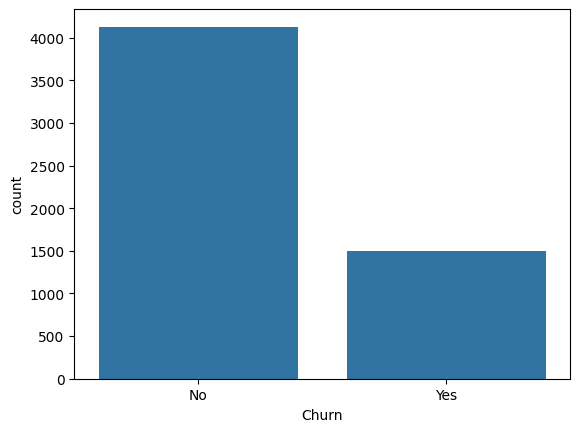

In [188]:
sns.countplot(data=df_train, x='Churn')
plt.show()

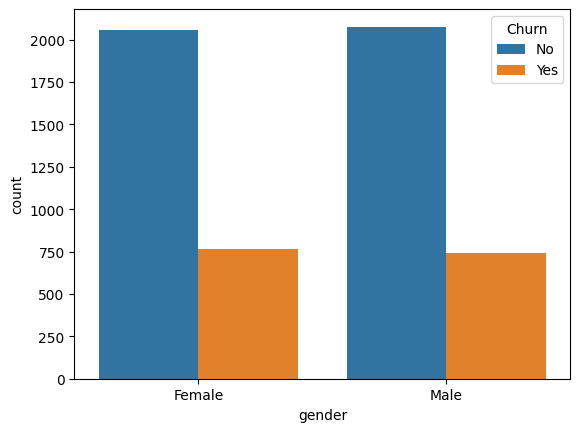

In [189]:
sns.countplot(data=df_train, x='gender', hue='Churn')
plt.show()

In [190]:
df_train.drop(columns=['gender'], inplace=True)
df_test.drop(columns=['gender'], inplace=True)

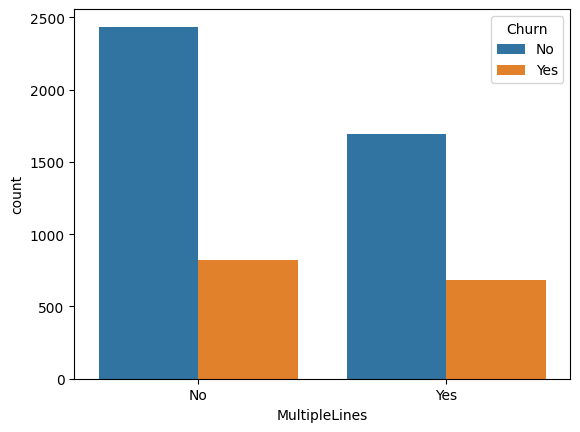

In [191]:
sns.countplot(data=df_train, x='MultipleLines', hue='Churn')
plt.show()

## Encoding


### Label encoding

In [192]:
# Label Encoding for target(Churn)
label_enc = LabelEncoder()
df_train['Churn'] = label_enc.fit_transform(df_train['Churn'])
df_test['Churn'] = label_enc.fit_transform(df_test['Churn'])

In [193]:
df_train['InternetService'] = label_enc.fit_transform(df_train['InternetService'])
df_test['InternetService'] = label_enc.fit_transform(df_test['InternetService'])

In [194]:
df_train['PaymentMethod'] = label_enc.fit_transform(df_train['PaymentMethod'])
df_test['PaymentMethod'] = label_enc.fit_transform(df_test['PaymentMethod'])

### Ordinal encoding

In [195]:
contract_order = ['Month-to-month', 'One year', 'Two year']

ordinal_enc = OrdinalEncoder(categories=[contract_order])

In [196]:
df_train['Contract'] = ordinal_enc.fit_transform(df_train[['Contract']])
df_test['Contract'] = ordinal_enc.fit_transform(df_test[['Contract']])

### One-Hot Encoding

In [197]:
df_train = pd.get_dummies(df_train,\
                          columns=['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',\
                                   'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling'],\
                          dtype=int, drop_first=True)


In [198]:
df_test = pd.get_dummies(df_test,\
                          columns=['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',\
                                   'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling'],\
                          dtype=int, drop_first=True)

In [199]:
df_train.head()

,SeniorCitizen,tenure,InternetService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,PhoneService_Yes,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,PaperlessBilling_Yes
0,0,0.486111,2,1.0,3,0.024876,0.082235,0,1,0,0,0,0,0,0,0,0
1,0,0.388889,0,0.0,3,0.174129,0.113719,0,0,0,0,0,1,1,0,0,1
2,0,0.777778,1,0.0,2,0.799502,0.671082,0,1,1,0,1,0,0,1,1,0
3,0,0.541667,2,2.0,0,0.021891,0.093040,0,1,0,0,0,0,0,0,0,1
4,0,0.597222,0,1.0,0,0.328358,0.257317,0,0,0,0,1,0,1,1,0,1


In [200]:
df_test.head()

,SeniorCitizen,tenure,InternetService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,PhoneService_Yes,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,PaperlessBilling_Yes
0,0,0.555556,1,0.0,2,0.625626,0.383837,0,1,1,0,0,1,0,0,0,1
1,0,0.166667,0,1.0,2,0.602102,0.100600,0,1,1,1,0,1,0,1,1,0
2,0,0.597222,1,1.0,2,0.813814,0.491625,1,1,1,0,0,0,1,1,1,1
3,0,1.000000,1,2.0,2,0.995996,1.000000,0,1,1,1,1,1,1,1,1,1
4,0,0.138889,0,0.0,2,0.175676,0.041649,0,0,0,0,1,0,1,0,0,0


# Classification

## Model Building

In [201]:
X_train = df_train.drop('Churn', axis=1)
y_train = df_train['Churn']

X_test = df_test.drop('Churn', axis=1)
y_test = df_test['Churn']


### Logistic Regression Model

In [202]:
#building Logistic regression model
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train) # training the model
y_pred = log_reg_model.predict(X_test) # predicting the test data
#evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred)
precision_lr = precision_score(y_test, y_pred, average='weighted')
recall_lr = recall_score(y_test,y_pred, average='weighted')

print('Accuracy : ', accuracy_lr)
print('Precision : ', precision_lr)
print('Recall : ', recall_lr)

Accuracy :  0.8161816891412349
Precision :  0.8080045237121575
Recall :  0.8161816891412349


In [203]:
# precission using Threshold
y_pred_threshold = log_reg_model.predict_proba(X_test)[:, 1]
# for class 1.
y_pred_threshold = (y_pred_threshold > 0.33).astype(int)

#evaluate the model
accuracy_thresh = accuracy_score(y_test, y_pred_threshold)
precision_thresh = precision_score(y_test, y_pred_threshold, average='weighted')
recall_thresh = recall_score(y_test,y_pred_threshold, average='weighted')

print('Threshold value used = 0.33')
print('Accuracy : ', accuracy_thresh)
print('Precision : ', precision_thresh)
print('Recall : ', recall_thresh)

Threshold value used = 0.33
Accuracy :  0.7572746628814763
Precision :  0.7911627435225074
Recall :  0.7572746628814763


### k-NN

In [204]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train) #training model
y_pred_knn = knn.predict(X_test) # prediction
# evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')

print('Accuracy : ', accuracy_knn)
print('Precision : ', precision_knn)
print('Recall : ', recall_knn)

Accuracy :  0.7466288147622427
Precision :  0.7386047198186647
Recall :  0.7466288147622427


### Naive-Bayes Classification

In [205]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train) # training the model
y_pred_nb = nb_model.predict(X_test) # predicting the test data
#evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='weighted')
recall_nb = recall_score(y_test, y_pred_nb, average='weighted')

print('Accuracy : ', accuracy_nb)
print('Precision : ', precision_nb)
print('Recall : ', recall_nb)

Accuracy :  0.7544357700496807
Precision :  0.786110810844409
Recall :  0.7544357700496807


### SVM Classifier

In [206]:
svm_model = SVC()
svm_model.fit(X_train, y_train) # training the model
y_pred_svm = svm_model.predict(X_test) # predicting the test data
#evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')

confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)

print('Accuracy : ', accuracy_svm)
print('Precision : ', precision_svm)
print('Recall : ', recall_svm)
print('Confusion Matrix :\n', confusion_matrix_svm)

Accuracy :  0.815471965933286
Precision :  0.8052133332072269
Recall :  0.815471965933286
Confusion Matrix :
 [[964  80]
 [180 185]]


### Decision Tree

In [207]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train) # training the model
y_pred_decision = decision_tree_model.predict(X_test) # predicting the test data
#evaluate the model
accuracy_decision = accuracy_score(y_test, y_pred_decision)
precision_decision = precision_score(y_test, y_pred_decision, average='weighted')
recall_decision = recall_score(y_test, y_pred_decision, average='weighted')

print('Accuracy : ', accuracy_decision)
print('Precision : ', precision_decision)
print('Recall : ', recall_decision)

Accuracy :  0.7182398864442867
Precision :  0.7205096310973944
Recall :  0.7182398864442867


### Random Forest

In [208]:
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train) # training the model
y_pred_forest = random_forest_model.predict(X_test) # predicting the test data
#evaluate the model
accuracy_forest = accuracy_score(y_test, y_pred_forest)
precision_forest = precision_score(y_test, y_pred_forest, average='weighted')
recall_forest = recall_score(y_test, y_pred_forest, average='weighted')

print('Accuracy : ', accuracy_forest)
print('Precision : ', precision_forest)
print('Recall : ', recall_forest)

Accuracy :  0.7806955287437899
Precision :  0.768886131632665
Recall :  0.7806955287437899


## Comparison of models

In [209]:
model_comparision = {'Model': ['Logistic Regression Model','k-NN', 'Naive-Bayes', 'SVM Classifier', 'Decision Tree', 'Random Forest'],
                     'Accuracy': [accuracy_lr, accuracy_knn, accuracy_nb, accuracy_svm, accuracy_decision, accuracy_forest],
                     'Precision':[precision_lr, precision_knn, precision_nb, precision_svm, precision_decision, precision_forest],
                     'Recall':[recall_lr, recall_knn, recall_nb, recall_svm, recall_decision, recall_forest]
                     }
df_comparison = pd.DataFrame(model_comparision)
df_comparison

,Model,Accuracy,Precision,Recall
0,Logistic Regression Model,0.816182,0.808005,0.816182
1,k-NN,0.746629,0.738605,0.746629
2,Naive-Bayes,0.754436,0.786111,0.754436
3,SVM Classifier,0.815472,0.805213,0.815472
4,Decision Tree,0.718240,0.720510,0.718240
5,Random Forest,0.780696,0.768886,0.780696


## Cross Validation

In [210]:
# Cross validation KFOLD means we are spliting the entire data into
# n_split = 5
kf = KFold(n_splits=5, shuffle=True, random_state=42)
# model_LR = LogisticRegression(max_iter=100)
# model_DT = DecisionTreeClassifier()
# model_KNN = KNeighborsClassifier(n_neighbors=5)

cv_scores_LR = cross_val_score(log_reg_model, X_train, y_train, cv=kf)
print("Logistic Regression Cross validation Accuracy:", cv_scores_LR)
print("Logistic Regression Cross validation mean Accuracy:", cv_scores_LR.mean())

Logistic Regression Cross validation Accuracy: [0.78527063 0.81011535 0.79236912 0.79325643 0.80461812]
Logistic Regression Cross validation mean Accuracy: 0.7971259304555863


In [211]:
cv_scores_knn = cross_val_score(knn, X_train, y_train, cv=kf)
print("KNN Cross validation Accuracy:", cv_scores_knn)
print("KNN Cross validation mean Accuracy:", cv_scores_knn.mean())

KNN Cross validation Accuracy: [0.70718722 0.75332742 0.75332742 0.73913043 0.75399645]
KNN Cross validation mean Accuracy: 0.741393788189459


In [212]:
cv_scores_nb = cross_val_score(nb_model, X_train, y_train, cv=kf)
print("Naive-Bayes Cross validation Accuracy:", cv_scores_nb)
print("Naive-Bayes Cross validation mean Accuracy:", cv_scores_nb.mean())

Naive-Bayes Cross validation Accuracy: [0.75865129 0.77018634 0.75421473 0.78438332 0.75488455]
Naive-Bayes Cross validation mean Accuracy: 0.7644640433978828


In [213]:
cv_scores_svm = cross_val_score(svm_model, X_train, y_train, cv=kf)
print("KNN Cross validation Accuracy:", cv_scores_svm)
print("KNN Cross validation mean Accuracy:", cv_scores_svm.mean())

KNN Cross validation Accuracy: [0.79148181 0.80390417 0.79236912 0.79236912 0.78774423]
KNN Cross validation mean Accuracy: 0.7935736901911896


In [214]:
cv_scores_DT = cross_val_score(decision_tree_model, X_train, y_train, cv=kf)
print("Decission Tree Cross validation Accuracy:", cv_scores_DT)
print("Decission Tree Cross validation mean Accuracy:", cv_scores_DT.mean())

Decission Tree Cross validation Accuracy: [0.7284827  0.75066548 0.73558119 0.72404614 0.71492007]
Decission Tree Cross validation mean Accuracy: 0.7307391162504078


In [215]:
cv_scores_forest = cross_val_score(random_forest_model, X_train, y_train, cv=kf)
print("KNN Cross validation Accuracy:", cv_scores_forest)
print("KNN Cross validation mean Accuracy:", cv_scores_forest.mean())

KNN Cross validation Accuracy: [0.77905945 0.78881988 0.7826087  0.79148181 0.77353464]
KNN Cross validation mean Accuracy: 0.7831008934580087


## Bagging

In [216]:
# Bagging is done on the training data

print(f'Accuracy of a simple Decision tree model :{accuracy_decision}')
bagging_model_DT = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=10,
    max_samples=0.8,
    bootstrap=True,
    random_state=42)

bagging_model_DT.fit(X_train, y_train) # training the bagging model
y_pred_bagging_dt = bagging_model_DT.predict(X_test) #predict using the bagging
accuracy_bagging_dt = accuracy_score(y_test, y_pred_bagging_dt)
print(f"Accuracy of Bagging model :{accuracy_bagging_dt}")

Accuracy of a simple Decision tree model :0.7182398864442867
Accuracy of Bagging model :0.7856635911994322


In [217]:
print(f'Accuracy of a simple Logistic Regression model :{accuracy_lr}')
bagging_model_LR = BaggingClassifier(
    estimator=LogisticRegression(),
    n_estimators=10,
    max_samples=0.8,
    bootstrap=True,
    random_state=42)

bagging_model_LR.fit(X_train, y_train) # training the bagging model
y_pred_bagging_lr = bagging_model_LR.predict(X_test) #predict using the bagging
accuracy_bagging_lr = accuracy_score(y_test, y_pred_bagging_lr)
print(f"Accuracy of Bagging model :{accuracy_bagging_lr}")

Accuracy of a simple Logistic Regression model :0.8161816891412349
Accuracy of Bagging model :0.8140525195173882


In [218]:
print(f'Accuracy of a simple k-NN model :{accuracy_knn}')
bagging_model_KNN = BaggingClassifier(
    estimator=KNeighborsClassifier(),
    n_estimators=10,
    max_samples=0.8,
    bootstrap=True,
    random_state=42)

bagging_model_KNN.fit(X_train, y_train) # training the bagging model
y_pred_bagging_knn = bagging_model_KNN.predict(X_test) #predict using the bagging
accuracy_bagging_knn = accuracy_score(y_test, y_pred_bagging_knn)
print(f"Accuracy of Bagging model :{accuracy_bagging_knn}")

Accuracy of a simple k-NN model :0.7466288147622427
Accuracy of Bagging model :0.7608232789212207


In [219]:
print(f'Accuracy of a simple Naive-Bayes model :{accuracy_nb}')
bagging_model_NB = BaggingClassifier(
    estimator=GaussianNB(),
    n_estimators=10,
    max_samples=0.8,
    bootstrap=True,
    random_state=42)

bagging_model_NB.fit(X_train, y_train) # training the bagging model
y_pred_bagging_nb = bagging_model_NB.predict(X_test) #predict using the bagging
accuracy_bagging_nb = accuracy_score(y_test, y_pred_bagging_nb)
print(f"Accuracy of Bagging model :{accuracy_bagging_nb}")

Accuracy of a simple Naive-Bayes model :0.7544357700496807
Accuracy of Bagging model :0.7544357700496807


In [220]:
print(f'Accuracy of a simple SVM model :{accuracy_svm}')
bagging_model_SVM = BaggingClassifier(
    estimator=SVC(),
    n_estimators=10,
    max_samples=0.8,
    bootstrap=True,
    random_state=42)

bagging_model_SVM.fit(X_train, y_train) # training the bagging model
y_pred_bagging_svm = bagging_model_SVM.predict(X_test) #predict using the bagging
accuracy_bagging_svm = accuracy_score(y_test, y_pred_bagging_svm)
print(f"Accuracy of Bagging model :{accuracy_bagging_svm}")

Accuracy of a simple SVM model :0.815471965933286
Accuracy of Bagging model :0.8161816891412349


In [221]:
print(f'Accuracy of a simple Random Forest model :{accuracy_forest}')
bagging_model_RF = BaggingClassifier(
    estimator=RandomForestClassifier(),
    n_estimators=10,
    max_samples=0.8,
    bootstrap=True,
    random_state=42)

bagging_model_RF.fit(X_train, y_train) # training the bagging model
y_pred_bagging_rf = bagging_model_RF.predict(X_test) #predict using the bagging
accuracy_bagging_rf = accuracy_score(y_test, y_pred_bagging_rf)
print(f"Accuracy of Bagging model :{accuracy_bagging_rf}")

Accuracy of a simple Random Forest model :0.7806955287437899
Accuracy of Bagging model :0.7934705464868701


## Boosting

In [222]:
# to compare, we are reusing the Decision tree we build earlier
print(f'Accuracy of a simple Decision tree model :{accuracy_decision}')

ada_boost_clf_DT = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=10,
    learning_rate=0.1,
    random_state=42)

ada_boost_clf_DT.fit(X_train, y_train) # model training
y_pred_ada_boost_dt = ada_boost_clf_DT.predict(X_test) # Model Prediction
accuracy_ada_boost_dt = accuracy_score(y_test, y_pred_ada_boost_dt)
print(f"Accuracy of Boosting model :{accuracy_ada_boost_dt}")

Accuracy of a simple Decision tree model :0.7182398864442867
Accuracy of Boosting model :0.7331440738112136


In [223]:
print(f'Accuracy of a simple Logistic Regression model :{accuracy_lr}')

ada_boost_clf_LR = AdaBoostClassifier(
    estimator=LogisticRegression(),
    n_estimators=10,
    learning_rate=0.1,
    random_state=42)

ada_boost_clf_LR.fit(X_train, y_train) # model training
y_pred_ada_boost_lr = ada_boost_clf_LR.predict(X_test) # Model Prediction
accuracy_ada_boost_lr = accuracy_score(y_test, y_pred_ada_boost_lr)
print(f"Accuracy of Boosting model :{accuracy_ada_boost_lr}")

Accuracy of a simple Logistic Regression model :0.8161816891412349
Accuracy of Boosting model :0.7409510290986515


In [224]:
print(f'Accuracy of a simple Naive-Bayes model :{accuracy_nb}')

ada_boost_clf_NB = AdaBoostClassifier(
    estimator=GaussianNB(),
    n_estimators=10,
    learning_rate=0.1,
    random_state=42)

ada_boost_clf_NB.fit(X_train, y_train) # model training
y_pred_ada_boost_nb = ada_boost_clf_NB.predict(X_test) # Model Prediction
accuracy_ada_boost_nb = accuracy_score(y_test, y_pred_ada_boost_nb)
print(f"Accuracy of Boosting model :{accuracy_ada_boost_nb}")

Accuracy of a simple Naive-Bayes model :0.7544357700496807
Accuracy of Boosting model :0.758694109297374


In [225]:
print(f'Accuracy of a simple SVM model :{accuracy_svm}')

ada_boost_clf_SVM = AdaBoostClassifier(
    estimator=SVC(),
    n_estimators=10,
    learning_rate=0.1,
    random_state=42)

ada_boost_clf_SVM.fit(X_train, y_train) # model training
y_pred_ada_boost_svm = ada_boost_clf_SVM.predict(X_test) # Model Prediction
accuracy_ada_boost_svm = accuracy_score(y_test, y_pred_ada_boost_svm)
print(f"Accuracy of Boosting model :{accuracy_ada_boost_svm}")

Accuracy of a simple SVM model :0.815471965933286
Accuracy of Boosting model :0.7409510290986515


In [226]:
print(f'Accuracy of a simple Random Forest model :{accuracy_forest}')

ada_boost_clf_RF = AdaBoostClassifier(
    estimator=RandomForestClassifier(),
    n_estimators=10,
    learning_rate=0.1,
    random_state=42)

ada_boost_clf_RF.fit(X_train, y_train) # model training
y_pred_ada_boost_rf = ada_boost_clf_RF.predict(X_test) # Model Prediction
accuracy_ada_boost_rf = accuracy_score(y_test, y_pred_ada_boost_rf)
print(f"Accuracy of Boosting model :{accuracy_ada_boost_rf}")

Accuracy of a simple Random Forest model :0.7806955287437899
Accuracy of Boosting model :0.7849538679914834


## Stacking

In [227]:
model_LR_1 = LogisticRegression(max_iter=120)
model_KNN_1 = KNeighborsClassifier(n_neighbors=3)
model_SVM_1 = SVC()
model_DT_1 = DecisionTreeClassifier()
model_RF_1 = RandomForestClassifier()

# base models (models considered for stacking)
base_learners = [('LR', model_LR_1), ('DT', model_DT_1), ('kNN', model_KNN_1), ('SVM', model_SVM_1), ('RF', model_RF_1)]

# meta model (this can be any classification model)
meta_leaner = GaussianNB()

stacking_clf = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_leaner) #stacking model building

stacking_clf.fit(X_train, y_train) # stacking model training
y_pred_stacking = stacking_clf.predict(X_test) # stacking model prediction

accuracy_stack = accuracy_score(y_test, y_pred_stacking)
print(f'Accuracy of stacking model :{accuracy_stack}')

Accuracy of stacking model :0.7806955287437899


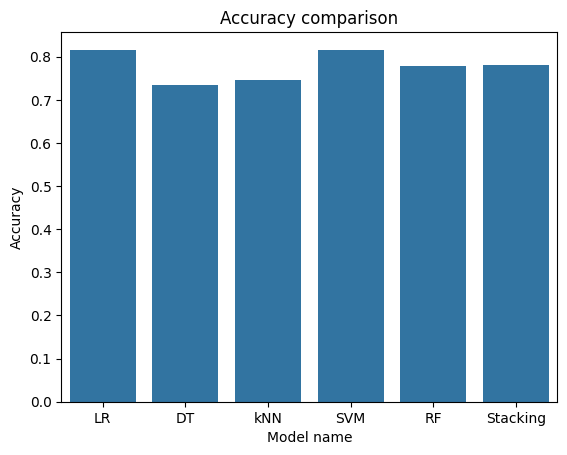

In [228]:
# comparion of accuracy
results={} # dictionary to store (model_name)
for name, model in base_learners:
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  results[name] = accuracy_score(y_test, y_pred)
  # populating 'results' dictionary with name of the model and accuracy

results['Stacking'] = accuracy_stack # adding the stack model accuracy to

sns.barplot(x= list(results.keys()), y= list(results.values()))
plt.title('Accuracy comparison')
plt.xlabel('Model name')
plt.ylabel('Accuracy')
plt.show()